HHU Methods of Artificial Intelligence in Life Sciences, Prof. Dr. Markus Kollmann, SS2020 

# PyTorch Introduction

by Cornelius Crijnen and Tim Kaiser

---

# Exercise Schedule

See Slack for the current exercise schedule

---

## Installation

We recommend using Python 3.7 and PyTorch >= 1.3 (1.5 was just released). You don't have to install CUDA seperatly! The PyTorch installation installs the cudatoolkit package.

Take a look at https://pytorch.org/get-started/locally/. Set your preferences in the "Start Locally" section and run the command.

## What is PyTorch?

PyTorch is a Deep learning library that has two main features: The "tensor" datastructure, which is similar to
the Numpy ndarray and automatic differentiation for training neural networks. Also, it will allow us to run our
code on a GPU, which promises significantly faster computations. 

We will now take a look at part of the [PyTorch Tutorial](https://github.com/tuelwer/pytorch-tutorial) by Tobias Uelwer to get familiar with fundamentals like Tensors, automatic differentiation and function optimization in PyTorch:

---

## PyTorch Basics

Author: Tobias Uelwer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
print(torch.__version__)

1.5.0


In [2]:
# We create a new PyTorch tensor from a NumPy tensor
torch.from_numpy(np.ones((2, 2)))
# We can instantanly access its values unlike we are used to from tensorflow

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [3]:
# Generate a random tensor
A = torch.randn(4, 5)
A

tensor([[-0.7059, -0.0734, -0.2507, -0.3190, -0.3872],
        [ 2.4764,  0.9537,  0.3609,  0.0220, -2.7485],
        [-1.5454,  1.6380,  1.0632, -0.0463,  0.8789],
        [-1.0123,  1.3989,  2.1449, -0.2855, -0.9374]])

In [4]:
# Indexing
A[0, 0]

tensor(-0.7059)

In [5]:
# More indexing
A[:, 2]

tensor([-0.2507,  0.3609,  1.0632,  2.1449])

In [6]:
# Get the shape of A
A.shape

torch.Size([4, 5])

In [7]:
# Traces and matrix transpose
torch.trace(A.T @ A)

tensor(31.0642)

In [8]:
B = torch.randn(1, 5)
B

tensor([[ 1.0623, -0.6725,  0.8717, -0.2057,  1.6961]])

In [9]:
# Broadcasting
A * B

tensor([[-7.4990e-01,  4.9344e-02, -2.1852e-01,  6.5626e-02, -6.5674e-01],
        [ 2.6306e+00, -6.4137e-01,  3.1457e-01, -4.5296e-03, -4.6619e+00],
        [-1.6417e+00, -1.1015e+00,  9.2676e-01,  9.5170e-03,  1.4908e+00],
        [-1.0753e+00, -9.4077e-01,  1.8696e+00,  5.8742e-02, -1.5900e+00]])

In [10]:
# The function item() returns a simple Python scalar
type(torch.sum(A**2)), type(torch.sum(A**2).item())

(torch.Tensor, float)

In [11]:
# Reshaping
A.view(-1, 2, 10)

tensor([[[-0.7059, -0.0734, -0.2507, -0.3190, -0.3872,  2.4764,  0.9537,
           0.3609,  0.0220, -2.7485],
         [-1.5454,  1.6380,  1.0632, -0.0463,  0.8789, -1.0123,  1.3989,
           2.1449, -0.2855, -0.9374]]])

In [12]:
# Flattens a tensor to a vector (removes 'empty' dimensions)
Ones = torch.ones((2, 1, 9, 1))
Ones.shape, Ones.squeeze().shape

(torch.Size([2, 1, 9, 1]), torch.Size([2, 9]))

In [13]:
# Add dimensions
torch.ones(9).unsqueeze(0).shape, torch.ones(9).unsqueeze(1).shape

(torch.Size([1, 9]), torch.Size([9, 1]))

In [14]:
# Add new dimensions (this also works with numpy arrays...)
A[None, :, None, :, None].shape

torch.Size([1, 4, 1, 5, 1])

In [15]:
# Elementwise power
A**2

tensor([[4.9833e-01, 5.3835e-03, 6.2845e-02, 1.0174e-01, 1.4992e-01],
        [6.1324e+00, 9.0954e-01, 1.3024e-01, 4.8470e-04, 7.5544e+00],
        [2.3884e+00, 2.6829e+00, 1.1304e+00, 2.1397e-03, 7.7253e-01],
        [1.0247e+00, 1.9569e+00, 4.6007e+00, 8.1516e-02, 8.7879e-01]])

In [16]:
# Logarithm and absolute value
torch.log(torch.abs(A))

tensor([[-0.3482, -2.6122, -1.3835, -1.1427, -0.9488],
        [ 0.9068, -0.0474, -1.0192, -3.8160,  1.0111],
        [ 0.4353,  0.4934,  0.0613, -3.0736, -0.1290],
        [ 0.0122,  0.3357,  0.7631, -1.2535, -0.0646]])

In [17]:
# All close
torch.allclose(torch.log(torch.exp(A)), A)

True

In [18]:
A.exp().log() == A

tensor([[ True, False, False,  True,  True],
        [ True,  True, False, False,  True],
        [ True,  True,  True, False, False],
        [ True,  True,  True, False, False]])

In [19]:
cuda = torch.cuda.is_available()
print(f"Using GPU: {cuda}")

if cuda:
    A = A.cuda()

print(A)

Using GPU: True
tensor([[-0.7059, -0.0734, -0.2507, -0.3190, -0.3872],
        [ 2.4764,  0.9537,  0.3609,  0.0220, -2.7485],
        [-1.5454,  1.6380,  1.0632, -0.0463,  0.8789],
        [-1.0123,  1.3989,  2.1449, -0.2855, -0.9374]], device='cuda:0')


### Automatic Differentiation

In [20]:
# If we want to calculate gradients we need to specify this
# by setting requires_grad=True for each tensor
X = torch.ones(2, 2, requires_grad=True)
X

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [21]:
# We build a simple computational graph 
y = torch.sum(torch.exp(X))
y

tensor(10.8731, grad_fn=<SumBackward0>)

In [22]:
# In pytorch gradients are accumulated each time backward() is called.
# Keep that in mind!
y.backward(retain_graph=True) # don't free the graph buffers after backprop
X.grad

tensor([[2.7183, 2.7183],
        [2.7183, 2.7183]])

In [23]:
# To suppress this behavior we have to reset the gradients by
X.grad.zero_()
y.backward(retain_graph=True) # dont free the graph buffers after backprop
X.grad

tensor([[2.7183, 2.7183],
        [2.7183, 2.7183]])

### Optimizing Functions

In [24]:
# Define variable
x = torch.tensor([2., 2.], requires_grad=True).float()

We want to minimize the function $f(x_1, x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2$.

The function has a minimum at $(1, 1)$.

In [25]:
# Define objective
f = lambda x: 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [26]:
# Instantiate optimizer
optimizer = torch.optim.Adam([x])

In [27]:
i = 0
while True:
    f_val = f(x)
    
    optimizer.zero_grad()
    f_val.backward()
    optimizer.step()
    
    i += 1
    
    if torch.norm(x.grad) < 0.001:
        print(f"Converged after {i} iterations.")
        print(f"Minimum: {str(x.detach().numpy())}")
        break
    if i > 100000:
        print("Maximum number of iterations reached.")
        break

Converged after 15729 iterations.
Minimum: [1.0009778 1.0019593]


---

## Implementing Neural Networks

After familiarizing ourselves with the basics of Tensors and optimization in PyTorch, we want to build and train a 
Convolutional Network.

There are three ways to implement a Neural Network in PyTorch:
 
1. Barebones PyTorch: work directly with the lowest-level PyTorch Tensors. 
2. PyTorch Module API: use `nn.Module` to define arbitrary neural network architecture. 
3. PyTorch Sequential API: use `nn.Sequential` to define a linear feed-forward network very conveniently. 

Here is a table of comparison:

| API           | Flexibility | Convenience |
|---------------|-------------|-------------|
| Barebone      | High        | Low         |
| `nn.Module`     | High        | Medium      |
| `nn.Sequential` | Low         | High        |


In [28]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.transforms as transforms

### Barebones PyTorch

We will start with the barebone implementation of a Two-Layer Fully Connected Network. This helps explore the overall
code structure, the autograd engine and PyTorch's training conventions. 

First, we will define the network by defining its forward pass. Then, we have to initialize the weights for the entire
model and finally define a training loop to train it. 

We test our forward pass by running it on a batch of tensors filled with zeros. This is to make sure that we don't get
any errors and the network produces an output of the right shape. 

In [29]:
import torch.nn.functional as F  # useful stateless functions

def two_layer_fc(x, params):
    n = x.shape[0]
    # first we flatten the image
    x = x.view(n, -1)  # shape: [batch_size, C x H x W]
    
    w1, w2 = params
    x = F.relu(x @ w1)
    x = x @ w2
    return x
    
def test_two_layer_fc():
    hidden_layer_size = 42
    x = torch.zeros((64, 50), dtype=torch.float32)  # minibatch size 64, feature dimension 50
    w1 = torch.zeros((50, hidden_layer_size), dtype=torch.float32)
    w2 = torch.zeros((hidden_layer_size, 10), dtype=torch.float32)
    scores = two_layer_fc(x, [w1, w2])
    print(scores.size())  # you should see [64, 10]

test_two_layer_fc()

torch.Size([64, 10])


For the barebone approach, we need to manually initialize the network's weights. In order to make the parameters 
trainable, we have to set `requires_grad` to True. However, when modifying a tensor in any way (even moving them
to the GPU) will remove the `requires_grad` attribute, so make sure it is the last thing you do when initializing
weights. 

In [30]:
input_size = 28 * 28
hidden_size = 256
num_classes = 10

w1 = torch.zeros((input_size, hidden_size), dtype=torch.float32)
nn.init.kaiming_normal_(w1)
w2 = torch.zeros((hidden_size, num_classes), dtype=torch.float32)
nn.init.kaiming_normal_(w2)

if cuda:
    w1 = w1.cuda()
    w2 = w2.cuda()
    
w1.requires_grad_()
w2.requires_grad_()

tensor([[ 0.0782, -0.4408,  0.1352,  ..., -0.5220,  0.1263,  0.0523],
        [-0.8939,  0.1793, -0.5408,  ...,  0.1644,  0.6298,  0.5400],
        [ 0.1910,  0.4493, -0.2341,  ...,  0.1347, -0.2526, -0.6839],
        ...,
        [-0.0872,  0.1598,  0.2179,  ...,  0.5524, -0.1513,  0.0412],
        [-0.9306, -0.2383,  0.4012,  ..., -0.0381, -0.3458, -1.4162],
        [ 0.6678, -0.4526,  0.2623,  ...,  0.5545,  0.3942, -0.6713]],
       device='cuda:0', requires_grad=True)

### PyTorch Module API

The barebone approach quickly becomes inconvenient for larger networks, because we have to track the network's parameters
by hand. The PyTorch `nn.Module` API relieves us of this work by tracking all learnable parameters. All we have to do
is define the layers and forward pass of the network. Also, PyTorch now takes care of the weight's initialization for us.
If we want to use a specific initialization, we can do so in the `__init__` function. 

Here is an example of the same network as above, but using the `nn.Module` API.

In [31]:
class TwoLayerFC(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        # nn.init.kaiming_normal_(self.fc1.weight)
        # nn.init.kaiming_normal_(self.fc2.weight)
    
    def forward(self, x):
        n = x.shape[0]
        x = x.view(n, -1)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores

def test_TwoLayerFC():
    input_size = 50
    x = torch.zeros((64, input_size), dtype=torch.float32)  # minibatch size 64, feature dimension 50
    model = TwoLayerFC(input_size, 42, 10)
    scores = model(x)
    print(scores.size())  # you should see [64, 10]
    
test_TwoLayerFC()

torch.Size([64, 10])


### PyTorch Sequential API

In case we want even more convenience in defining a model than with the `nn.Module` API, we can turn to the
`nn.Sequential` API. It combines the steps of defining the layers and defining their connectivity in the forward pass. 
The trade-off is that we are limited to feed-forward architectures and cannot define more complex network structures. 
Everything about initialization, training and optimization remains the same as for the modular approach. 

In [32]:
# We need to wrap `flatten` function in a module in order to stack it
# in nn.Sequential
class Flatten(nn.Module):
    def forward(self, x):
        n = x.shape[0]
        return x.view(n, -1)

hidden_layer_size = 42

model = nn.Sequential(
    Flatten(),
    nn.Linear(50, hidden_layer_size),
    nn.ReLU(),
    nn.Linear(hidden_layer_size, 10))

def test_model(model):
    input_size = 50
    x = torch.zeros((64, input_size), dtype=torch.float32)  # minibatch size 64, feature dimension 50
    scores = model(x)
    print(scores.size())  # you should see [64, 10]
    
test_model(model)


torch.Size([64, 10])


## MNIST Classifier

Now we want to build and train a <b>Convolutional Network</b> on the [MNIST](https://en.wikipedia.org/wiki/MNIST_database)
dataset. We will be using a three-layer architecture with Dilation, Batch Normalization and ReLU activations and one fully
connected classification layer at the end. To see how convolutions with different parameter settings look like, have
a look at [this](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) visualization. For more information
on dilation, have a look at [this](https://towardsdatascience.com/review-dilated-convolution-semantic-segmentation-9d5a5bd768f5)
article.

We can make use of the `nn.Sequential` API to group blocks of conv-batchnorm-relu layers together. The last convolution
has kernel_size 1x1 (known as a 1x1 convolution), which serves as a downsampling layer because it reduces the number
of channels by taking a weighted sum of all input channels. 

Batch normalization is a way of improving the overall performance and stability of a network by normalizing inputs 
between layers. For a detailed explanation, have a look at [this](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c)
article. The `momentum` parameter controls the weighting of the running averages needed for the normalization. 

In [33]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=2, dilation=2),
            nn.BatchNorm2d(16, momentum=0.1),
            nn.ReLU())
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=2, dilation=2),
            nn.BatchNorm2d(32, momentum=0.1),
            nn.ReLU())
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 1, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(1, momentum=0.1),
            nn.ReLU())
        self.fc = nn.Linear(28*28, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x)
        return x

For this example we are using the PyTorch Dataloader. It's a convenient solution for batch training and provides easy
access to popular datasets, such as the MNIST dataset. After loading the dataset and setting parameters like batch_size, 
train and an optional transformation (normalization in this case), we can use the dataloader object as an iterator for
the training loop. 

We split the MNIST dataset into a portion for training and one for testing.

In [34]:
# Load dataset
tr = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) # Normalization for MNIST

training_data = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=tr)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=128,
                                          shuffle=True, num_workers=1)

test_data = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=tr)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128,
                                         shuffle=True, num_workers=1)

In [35]:
# The function parameters() is implemented in nn.Module
net = ConvNet()
if cuda:
    net = net.cuda()

In [36]:
cross_entropy = nn.CrossEntropyLoss() # instantiate loss 
optimizer = optim.Adam(net.parameters(), lr=1e-3, weight_decay=5e-4) # instantiate optimizer

In [37]:
epochs = 3
history = []

for i in range(0, epochs):
    for j,(inputs, labels) in enumerate(training_loader):
        if cuda:
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        # forward pass
        outputs = net(inputs)
        
        # training loss
        loss = cross_entropy(outputs, labels)
        
        # calculate total loss
        history.append(loss.item())
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # backward pass
        loss.backward()
        optimizer.step()

        if (j + 1) % 100 == 0:
            print(f"epoch: {i+1:2} batch: {j+1:4} loss: {history[-1]:3.4}")

epoch:  1 batch:  100 loss: 0.3065
epoch:  1 batch:  200 loss: 0.2593
epoch:  1 batch:  300 loss: 0.128
epoch:  1 batch:  400 loss: 0.1602
epoch:  2 batch:  100 loss: 0.0989
epoch:  2 batch:  200 loss: 0.2241
epoch:  2 batch:  300 loss: 0.2003
epoch:  2 batch:  400 loss: 0.08904
epoch:  3 batch:  100 loss: 0.07505
epoch:  3 batch:  200 loss: 0.0368
epoch:  3 batch:  300 loss: 0.1077
epoch:  3 batch:  400 loss: 0.02618


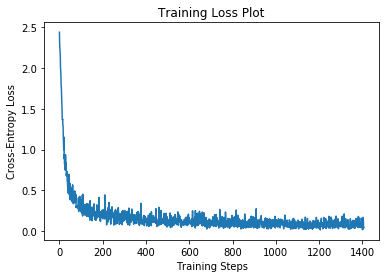

In [38]:
plt.plot(history);
plt.title("Training Loss Plot")
plt.xlabel("Training Steps")
plt.ylabel("Cross-Entropy Loss")
plt.show()

In [39]:
# Set model to evaluation mode 
# (important for batchnorm/dropout)
net.eval()

correct = 0

for inputs, labels in test_loader:
    with torch.no_grad():
        if cuda:
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        outputs = net(inputs)
        predicted_class = outputs.max(dim=1)[1]
        
        correct += (predicted_class == labels).float().sum().item() 
        
accuracy = correct / len(test_data)

print("Test Accuracy: ", accuracy)

Test Accuracy:  0.9748


In [40]:
# Save model to disk

# torch.save(net.state_dict(), "net")

In [41]:
# Load model

# net = ConvNet()
# net.load_state_dict(torch.load("net"))

## Further Reading and Exercises

If you still feel like you could use some more practice in PyTorch, there is an excellent PyTorch Tutorial Notebook
from the Deep Learning Course of Stanford. It will be posted on Slack and is an optional exercise.

For more reading on PyTorch, there is [this](https://github.com/jcjohnson/pytorch-examples) comprehensive PyTorch 
Introduction by Justin Johnson.
Also, feel free to check out the rest of Tobias Uelwer's [PyTorch Tutorial](https://github.com/tuelwer/pytorch-tutorial).

[This](https://github.com/pytorch/examples) is a collection of architectures and ML models implemented in PyTorch. Check
it out if you ever want to take a look at some finished PyTorch example code.  